## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [7]:
from sklearn.datasets import load_boston
import random


data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]

In [8]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

$$ Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$$
When $\hat{y_i} < y_i$:
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum(x_i)$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum(1)$$
When $\hat{y_i} > y_i$:
$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum(x_i)$$
$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum(1)$$

In [9]:
def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [10]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_hat_i < y_i:
            gradient += (-x_i)
        else:
            gradient += x_i
    return 1/n * gradient

def partial_b(x, y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_hat_i < y_i:
            gradient += -1
        else:
            gradient += 1
    return 1/n * gradient

In [12]:
trying_times = 20000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 0.07


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k += (-1 * k_gradient) * learning_rate

    current_b += (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -1.6795942250310816 best_b: 61.99069783724633, and the loss is: 28.975911172362434
When time is : 50, get best_k: -6.450087031355197 best_b: 61.01429467519098, and the loss is: 9.095235459992407
When time is : 100, get best_k: -6.415297031355185 best_b: 60.77994684910396, and the loss is: 9.0791934656506
When time is : 150, get best_k: -6.377119363370984 best_b: 60.546152382700726, and the loss is: 9.06315989857214
When time is : 200, get best_k: -6.338941695386784 best_b: 60.31235791629749, and the loss is: 9.047126331493683
When time is : 250, get best_k: -6.300764027402583 best_b: 60.07856344989426, and the loss is: 9.031092764415211
When time is : 300, get best_k: -6.262586359418383 best_b: 59.84476898349103, and the loss is: 9.015059197336749
When time is : 350, get best_k: -6.224408691434182 best_b: 59.6109745170878, and the loss is: 8.999025630258286
When time is : 400, get best_k: -6.186231023449982 best_b: 59.377180050684565, and the loss is: 8.98

When time is : 3950, get best_k: -3.5114720906438333 best_b: 43.00022352893969, and the loss is: 7.8747580296711135
When time is : 4000, get best_k: -3.474130549141854 best_b: 42.773069378741965, and the loss is: 7.8596203844902055
When time is : 4050, get best_k: -3.4384828416319695 best_b: 42.54563854870234, and the loss is: 7.844477235557548
When time is : 4100, get best_k: -3.40114130012999 best_b: 42.318484398504616, and the loss is: 7.829333856120194
When time is : 4150, get best_k: -3.363799758628011 best_b: 42.09133024830689, and the loss is: 7.814190476682842
When time is : 4200, get best_k: -3.3265663989442134 best_b: 41.86417609810916, and the loss is: 7.799049350890837
When time is : 4250, get best_k: -3.291280311987689 best_b: 41.637021947911435, and the loss is: 7.783952400501378
When time is : 4300, get best_k: -3.2562105886675283 best_b: 41.40986779771371, and the loss is: 7.768861307923768
When time is : 4350, get best_k: -3.2211408653473677 best_b: 41.18271364751598, 

When time is : 7750, get best_k: -0.8233874266121382 best_b: 26.605836177160768, and the loss is: 6.8361844141973185
When time is : 7800, get best_k: -0.7886571894579868 best_b: 26.39832629573784, and the loss is: 6.823536831265623
When time is : 7850, get best_k: -0.7539269523038354 best_b: 26.19081641431491, and the loss is: 6.810889248333929
When time is : 7900, get best_k: -0.7191967151496841 best_b: 25.98330653289198, and the loss is: 6.798241665402223
When time is : 7950, get best_k: -0.6844664779955327 best_b: 25.77579665146905, and the loss is: 6.785594082470536
When time is : 8000, get best_k: -0.6489136716714217 best_b: 25.57105356846508, and the loss is: 6.773268808307684
When time is : 8050, get best_k: -0.6151645412366393 best_b: 25.368247244354382, and the loss is: 6.761183124969014
When time is : 8100, get best_k: -0.5830644226595645 best_b: 25.16516424040179, and the loss is: 6.74912434965789
When time is : 8150, get best_k: -0.5477761222643078 best_b: 24.96263459613299

When time is : 11600, get best_k: 1.584102375759358 best_b: 11.821725505223235, and the loss is: 6.002316832113188
When time is : 11650, get best_k: 1.6145202808976942 best_b: 11.640223528938623, and the loss is: 5.992641799530344
When time is : 11700, get best_k: 1.6446343915696273 best_b: 11.458721552654012, and the loss is: 5.982970250977717
When time is : 11750, get best_k: 1.6741409133087544 best_b: 11.2772195763694, and the loss is: 5.973306034620357
When time is : 11800, get best_k: 1.7018753006605296 best_b: 11.095440920242893, and the loss is: 5.963647196752142
When time is : 11850, get best_k: 1.7296096880123049 best_b: 10.913662264116386, and the loss is: 5.953988723018753
When time is : 11900, get best_k: 1.7601836405814715 best_b: 10.732436967673687, and the loss is: 5.944351466135217
When time is : 11950, get best_k: 1.7877326524391757 best_b: 10.550934991389108, and the loss is: 5.934707418725873
When time is : 12000, get best_k: 1.8170371978937183 best_b: 10.36998637478

When time is : 15200, get best_k: 3.550072296707872 best_b: -0.2437290402317282, and the loss is: 5.407707161300788
When time is : 15250, get best_k: 3.575596565482571 best_b: -0.3994997912198716, and the loss is: 5.400594381328283
When time is : 15300, get best_k: 3.601410241371895 best_b: -0.5549938623661173, and the loss is: 5.393500954347867
When time is : 15350, get best_k: 3.6286889370240667 best_b: -0.7096578939866703, and the loss is: 5.386458322631232
When time is : 15400, get best_k: 3.653330320423279 best_b: -0.8643219256072237, and the loss is: 5.379439816946958
When time is : 15450, get best_k: 3.677450439000358 best_b: -1.0189859572277773, and the loss is: 5.37243861362181
When time is : 15500, get best_k: 3.7032643915695322 best_b: -1.1733733090064304, and the loss is: 5.365435789623395
When time is : 15550, get best_k: 3.7268488579726977 best_b: -1.3280373406269808, and the loss is: 5.358446011176848
When time is : 15600, get best_k: 3.750183205798787 best_b: -1.4824246

When time is : 18850, get best_k: 5.178860794731671 best_b: -10.210566984895754, and the loss is: 5.006178872446369
When time is : 18900, get best_k: 5.1982264469055846 best_b: -10.331199395962942, and the loss is: 5.001920015357275
When time is : 18950, get best_k: 5.2166536010557865 best_b: -10.451831807030135, and the loss is: 4.997663303835693
When time is : 19000, get best_k: 5.235683363901636 best_b: -10.572187538255431, and the loss is: 4.993417564869058
When time is : 19050, get best_k: 5.255749016075549 best_b: -10.69226658963884, and the loss is: 4.9891836110726455
When time is : 19100, get best_k: 5.274819727538 best_b: -10.812345641022242, and the loss is: 4.984956184996006
When time is : 19150, get best_k: 5.293537672202035 best_b: -10.932148012563745, and the loss is: 4.9808043306825995
When time is : 19200, get best_k: 5.313998699870022 best_b: -11.051397024421465, and the loss is: 4.9765776499547085
When time is : 19250, get best_k: 5.334284589198088 best_b: -11.1703693

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [140]:
solution = {}

In [141]:
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [142]:
edit_distance('ABCDE', 'ABCCEF')

2

In [143]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [181]:
parse_solutions(solution, 'ABCDE', 'ABCCEF')

"('ABCDE', 'ABCCEF'): ADD F->('ABCDE', 'ABCCE'): ->('ABCD', 'ABCC'): SUB D => C->('ABC', 'ABC'): ->('AB', 'AB'): ->('A', 'A'): "

In [195]:
def parse_solution(solution, string1, string2):
    result = []
    def parser(solution, string1, string2):
        if not string1 or not string2: return None

        operation = solution[(string1, string2)]
        if operation != '':
            result.append('\'{}\' to \'{}\': \'{}\''.format(string1, string2, operation))
        if operation.startswith('DEL'):
            parser(solution, string1[:-1], string2)
        elif operation.startswith('ADD'):
            parser(solution, string1, string2[:-1])
        elif operation.startswith('SUB') or operation == '':
            parser(solution, string1[:-1], string2[:-1])
        return result
    
    result = parser(solution, string1, string2)
    if result != None:
        return '-->'.join(result)
    else: return None

In [196]:
parse_solution(solution, 'ABCDE', 'ABCCEF')

"'ABCDE' to 'ABCCEF': 'ADD F'-->'ABCD' to 'ABCC': 'SUB D => C'"

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: Because it is negative of derivative is the direction that the loss  decreases the fastest.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: Gradient is the partial derivative of the loss function to the parameters. Descent means the drop is towards the direction of negative of derivative.


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: It follows the right direction and minimize the loss function at the direction of the negative derivate.

4. Using the simple words to describe: What's the machine leanring.¶

Ans: Machine learning is the approach that uses data and ml method / algo as input to derive the function / relationship formula.

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: Dynamic programming can be used to solve problems that have repeated sub-problems. The difference with search problem is that dynamic programming reuses the solved sub-problems, instead of solving it again and again. Therefore, more effecient.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: Machine learning method requires sufficient training data, but dynamic programming does not. Instead, DP requires a set of rules or a reference table.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: 
1. Find the best route for food delivery
2. Fibonacci sequence
4. Sequence alignment
5. Checkerboard game

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:
1. Approximate string matching
2. Checking of spelling mistakes
3. Similarity between strings
4. Checking of OCR mistakes

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:
1. Analyze how is sub-problems repeats. If the sub-problems of a problem is the same, except the input value, then this problem can be solved by DP.
2. Store the result of the sub-problems. This creates a reference table as  solution for DP.
3. Parse the solution to get the detailed result. Use the reference table to come out with the detailed result.

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: 
1. No general formation of Dynamic Program is available; every problem has to be solving in its own way.
2. Dividing problem in sub problem and storing inter mediate results consumes memory.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

In [198]:
!pip install bottle

In [201]:
from bottle import route, run, template

In [202]:
@route('/hello/<name>')
def index(name):
    return template('<b>Hello {{name}}</b>!', name=name)

run(host='localhost', port=8080)

Bottle v0.12.17 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [16/Jul/2019 17:24:10] "GET / HTTP/1.1" 404 720
127.0.0.1 - - [16/Jul/2019 17:24:33] code 400, message Bad request version ('\x8a\x8aÀ+À/À,À0Ì©Ì¨À\x13À\x14\x00\x9c\x00\x9d\x00/\x005\x00')
127.0.0.1 - - [16/Jul/2019 17:24:33] " À  ¼í*w=NÝp¤,5P<¸Únò­m^Ì¨¯M  À+À/À,À0Ì©Ì¨ÀÀ   / 5 " 400 -
127.0.0.1 - - [16/Jul/2019 17:24:33] code 400, message Bad request syntax ('\x16\x03\x01\x00À\x01\x00\x00¼\x03\x03\x1c\x91Þ%=áÒ\x8a\xa0+{}ý}DIyÈ\x94_\t\x86¹ÈQuyG8ø9\x81\x00\x00\x1cÚÚÀ+À/À,À0Ì©Ì¨À\x13À\x14\x00\x9c\x00\x9d\x00/\x005\x00')
127.0.0.1 - - [16/Jul/2019 17:24:33] " À  ¼Þ%=áÒ +{}ý}DIyÈ_	¹ÈQuyG8ø9  ÚÚÀ+À/À,À0Ì©Ì¨ÀÀ   / 5 " 400 -
127.0.0.1 - - [16/Jul/2019 17:25:03] "GET / HTTP/1.1" 404 720
127.0.0.1 - - [16/Jul/2019 17:25:12] "GET / HTTP/1.1" 404 720
127.0.0.1 - - [16/Jul/2019 17:25:27] "GET / HTTP/1.1" 404 720
127.0.0.1 - - [16/

### (Optinal) Finish the k-person-salesman problem:

In [9]:
import random
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import math
import time

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

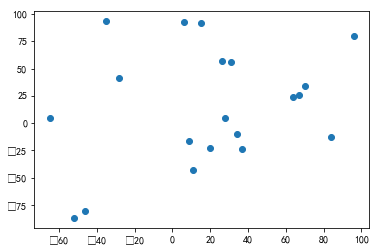

In [3]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [5]:
import matplotlib.pyplot as plt

### 如果指定一个出发点（红色），把全程走一遍的最短路径怎么算？

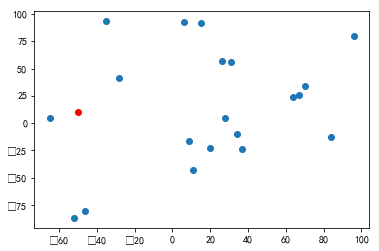

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [14]:
point_list = [(latitudes[i], longitude[i]) for i in range(0, len(latitudes))]
point_list.insert(0, chosen_p)
point_array = np.array(point_list)

In [16]:
distance = np.zeros((point_array.shape[0], point_array.shape[0]))
for i in range(point_array.shape[0]):
    for j in range(point_array.shape[0]):
        distance[i, j] = math.sqrt(np.sum((point_array[i, :] - point_array[j, :]) ** 2))

In [17]:
distance

array([[  0.        ,  38.01315562, 104.63746939,  85.32877592,
         89.35882721, 135.95955281,  15.8113883 ,  86.34813258,
        122.37646833,  80.8084154 ,  64.47480128, 118.08894953,
         78.16009212, 161.91355718,  93.15041599,  93.40770846,
         77.38862966, 114.85643212, 100.12492197,  97.02061637,
         90.08884504],
       [ 38.01315562,   0.        ,  66.70832032,  53.46026562,
         56.32051136, 124.33824834,  51.623638  ,  80.28075735,
         98.24968193,  92.61209424,  67.95586803,  96.17692031,
         66.57326791, 129.98846103,  60.87692502,  91.92388155,
         80.        ,  93.55746897,  62.12889827, 130.23056477,
        122.33151679],
       [104.63746939,  66.70832032,   0.        ,  50.03998401,
         36.68787266, 125.64234955, 118.19052415, 103.75451797,
         79.93122043, 135.05924626, 108.16653826,  84.02380615,
         87.96590248,  81.88406438,  39.39543121, 118.06777715,
        115.10864433,  83.81527307,   9.05538514, 191.1282

In [32]:
"""
N:计数
s:二进制表示，遍历过得城市对应位为0，未遍历为1
dp:动态规划的距离数组
dist：目的地间距离矩阵
sumpath:目前的最小路径总长度
Dtemp：当前最小距离
path:记录下一个应该到达的城市
"""

N = point_array.shape[0]
path = np.ones((2 ** N -1, N), dtype = np.int)
dp = np.ones((2 ** N -1, N)) * -1

In [26]:
def TSP(s, init):
    if dp[s][init] != -1:
        return dp[s][init]
    
    if s == 0:
        return distance[0][init]
    sumpath = float('inf')
    
    for i in range(N):
        if s & (1 << i):
            m = TSP(s & (~ (1 << i)), i) + distance[i][init] #s & (~ (1 << i))让遍历过的点的相应位置变0
            if m < sumpath:
                sumpath = m
                path[s][init] = i
    dp[s][init] = sumpath
    return dp[s][init]
    

In [27]:
init_point = 0
s = 0
for i in range(1, N):
    s = s | (1 <<i)
    
start = time.time()
distance_result = TSP(s, init_point)
end = time.time()

In [29]:
for i in range(1, N):
    s = s | (1<< i)
init = 0
num = 0
print(distance_result)
route = [chosen_p]


687.5994066432721


In [30]:
while True:
    print(path[s][init])
    init = path[s][init]
    route.append(point_list[init])
    s = s & (~ (1 << init))
    num += 1
    if num > N-2:
        break
print("Running time is %s" % (end - start))

1
3
18
2
4
14
13
8
11
17
5
15
7
12
10
16
9
20
19
6
Running time is 181.70063257217407


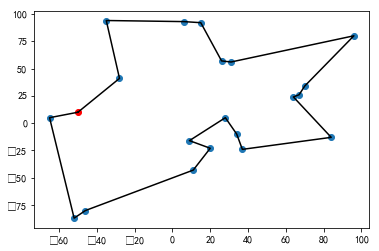

In [33]:
# 此代码为结果可视化展示

route.append(chosen_p)
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
x = [point[0] for point in route]
y = [point[1] for point in route]
plt.plot(x, y, color='black')

### 下面这个方法穷尽所有path的distance，再找出最小的。
### 对于20个点，运行时间太长，不可行。

In [13]:
def route_distance(start, points): # 得到一个点与点之间的距离列表
    
    if len(points) == 0: return 0
    
    def point_distance(point1, point2):
        return math.sqrt((point1[0]-point2[0]) ** 2 + (point1[1]-point2[1]) ** 2)
    
    for i in range(len(points)):
        distance = point_distance(start, points[i])
        solution[(start, points[i])] = distance  
    
    for i in range(0, len(points)-1):
        result2 = route_distance(points[i], points[i+1:])
    
    return solution

In [25]:
points

[(-50, 10),
 (35, 31),
 (18, 0),
 (22, -1),
 (63, 0),
 (-79, 80),
 (15, -91),
 (6, 18),
 (82, -76),
 (56, -90),
 (-79, -78)]

In [268]:
# 这个方法穷尽所有path的distance，再找出最小的。运行时间很长。对于20个点，不可行。

solution = {}
result = {}

points = [(latitudes[i], longitude[i]) for i in range(0, len(latitudes))]
points_permutations = itertools.permutations(points)

solution = route_distance(chosen_p, points)

for key, value in solution.items():
    solution2[(key[1], key[0])] = value

solution.update(solution2)


def parse_solution(solution, start, points):  
    if not start or not points or not solution: return None
    
    
    def calculate_distance(points):
        distance = 0
        for i in range(len(points)-1):
            distance += solution[(points[i], points[i+1])]
        return distance
    
    for k in points_permutations:
        k = list(k)
        k.insert(0, start)
        k.append(start)
        current_distance = calculate_distance(k)
        result[(current_distance)] = k
        

    shortest_path = min(result.items())

    return shortest_path

### 如果指定三个出发点（红色），把全程走一遍的最短路径怎么算？假设同时从三个点出发。

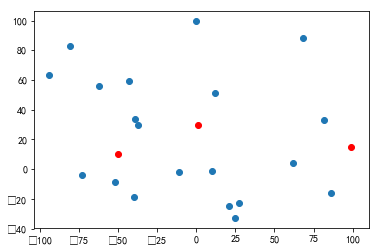

In [14]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')